In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df.shape
df.head()

,AGE,GENDER,TOTAL BILIRUBIN,DIRECT BILIRUBIN,TOTAL PROTEINS,ALBUMIN,A/G RATIO,SGPT,SGOT,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [3]:
df_duplicate = df[df.duplicated(keep = False)]
df_duplicate.head(10)



,AGE,GENDER,TOTAL BILIRUBIN,DIRECT BILIRUBIN,TOTAL PROTEINS,ALBUMIN,A/G RATIO,SGPT,SGOT,0.9,1
17,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.8,1
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.8,1
24,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.1,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.1,1
32,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.8,2
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.8,2
53,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.5,1
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.5,1
60,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.0,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.0,1


In [4]:
print(df.isnull().sum())

AGE                 0
GENDER              0
TOTAL BILIRUBIN     0
DIRECT BILIRUBIN    0
TOTAL PROTEINS      0
ALBUMIN             0
A/G RATIO           0
SGPT                0
SGOT                0
0.9                 4
1                   0
dtype: int64


In [5]:
copyDF = copy.deepcopy(df)
copyDF = copyDF.dropna(axis=0)



In [6]:
npdf = np.array(df)

df2= pd.DataFrame({})

print(df2)

print("length before removing Nan values: %d"%len(df)) 

df2= df [pd.notnull(df)]
for i in range(len(df)):
    flag=0
    for j in range (11):
        if npdf[i][j] == 'Nan':
            flag=1
            if flag==0:
                df2.append(pd.DataFrame (npdf[i])) 
            print("length after removing Nan values: %d"%len(df2))




Empty DataFrame
Columns: []
Index: []
length before removing Nan values: 582


In [7]:
npdf[0]

array([62, 'Male', 10.9, 5.5, 699, 64, 100, 7.5, 3.2, 0.74, 1],
      dtype=object)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(copyDF['GENDER'])
#print(type(le.transform(copyDF['Gender'])))
le.fit(copyDF['1'])
#print(le.transform(copyDF['Result']))
le.fit(copyDF['GENDER'])
copyDF['GENDER'] = le.transform(copyDF['GENDER'])
le.fit(copyDF['1'])
copyDF['1'] = le.transform(copyDF['1'])
copyDF


,AGE,GENDER,TOTAL BILIRUBIN,DIRECT BILIRUBIN,TOTAL PROTEINS,ALBUMIN,A/G RATIO,SGPT,SGOT,0.9,1
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,0
...,...,...,...,...,...,...,...,...,...,...,...
577,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
578,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
579,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
580,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


In [9]:
X = copyDF[['AGE','GENDER','TOTAL BILIRUBIN','DIRECT BILIRUBIN','TOTAL PROTEINS','ALBUMIN','A/G RATIO','SGPT','SGOT','0.9','1']]
y = copyDF[['1']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
                                                    

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(462, 11)
(462, 1)
(116, 11)
(116, 1)


In [11]:
X_train.head(6)

,AGE,GENDER,TOTAL BILIRUBIN,DIRECT BILIRUBIN,TOTAL PROTEINS,ALBUMIN,A/G RATIO,SGPT,SGOT,0.9,1
445,54,1,0.8,0.2,181,35,20,5.5,2.7,0.96,0
407,48,1,2.4,1.1,554,141,73,7.5,3.6,0.90,0
119,32,1,23.0,11.3,300,482,275,7.1,3.5,0.90,0
521,46,0,0.8,0.2,185,24,15,7.9,3.7,0.80,0
498,55,1,3.6,1.6,349,40,70,7.2,2.9,0.60,0
296,25,0,0.9,0.3,159,24,25,6.9,4.4,1.70,1


In [12]:
X_test.head(6)

,AGE,GENDER,TOTAL BILIRUBIN,DIRECT BILIRUBIN,TOTAL PROTEINS,ALBUMIN,A/G RATIO,SGPT,SGOT,0.9,1
192,49,1,1.3,0.4,206,30,25,6.0,3.1,1.06,1
423,32,0,0.7,0.1,240,12,15,7.0,3.0,0.70,0
354,19,1,1.4,0.8,178,13,26,8.0,4.6,1.30,1
414,70,1,1.3,0.3,690,93,40,3.6,2.7,0.70,0
484,22,0,6.7,3.2,850,154,248,6.2,2.8,0.80,0
569,16,1,2.6,1.2,236,131,90,5.4,2.6,0.90,0


In [13]:
y_train

,1
445,0
407,0
119,0
521,0
498,0
...,...
129,0
144,1
72,0
236,0


In [14]:
y_test.head(6)

,1
192,1
423,0
354,1
414,0
484,0
569,0


In [15]:
!pip install scikit-learn==0.24

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [17]:
import sklearn
from sklearn.ensemble import IsolationForest



In [19]:
clf = IsolationForest(max_samples=100, contamination=0.0)

In [20]:
df_drop = df.drop(axis=1, index=1)
df_drop.head()
df_drop_na = df_drop.dropna()


In [21]:
#clf.fit(np.vstack((df_drop_na.iloc[:, 8].values, df_drop_na.iloc[:, 9].values)).T)
clf.fit(X_train, y_train)
#clf_pred = clf.predict(np.vstack((df_drop_na.iloc[:, 8].values, df_drop_na.iloc[:
, 9].values)).T)
clf_pred = clf.predict(X_test)
clf_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [25]:
y_pred = clf.predict(X_test)
y_pred


array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

1.0

In [27]:
from sklearn.linear_model import LogisticRegression


In [29]:
clf = LogisticRegression(random_state=1, max_iter = 10000).fit(X_train, y_train.to_numpy().reshape(462, ))
y_pred = clf.predict(X_test)



In [30]:

y_pred


array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred)


1.0

In [32]:
y_train.to_numpy().reshape(462, 1)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train.to_numpy().reshape(462, ))
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  """HTML representation of estimator.


1.0

In [36]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  attributes : str, list or tuple of str, default=None


In [37]:
accuracy_score(y_test, y_pred)

0.6724137931034483

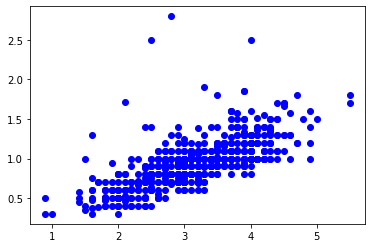

In [38]:
plt.scatter(df.iloc[:, 8].values, df.iloc[:, 9].values, color = ['blue'])

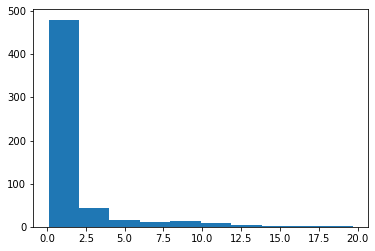

In [39]:
plt.hist(df.iloc[:, [3]])
plt.show()


<AxesSubplot:>

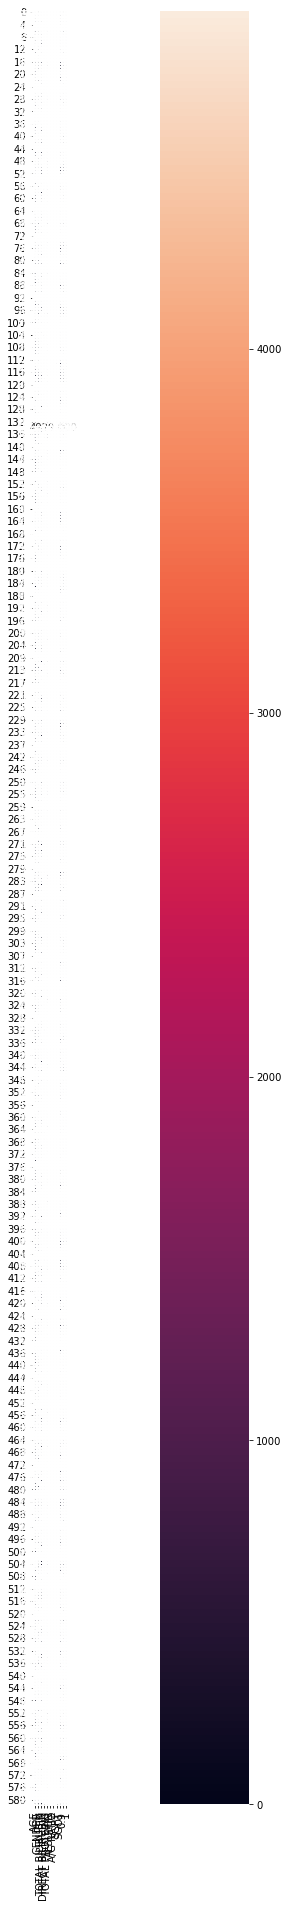

In [40]:
plt.figure(figsize=(33, 33))
sns.heatmap(copyDF, annot=True, fmt=".3f", linewidths=.5, square = True)

In [41]:
copyDF

,AGE,GENDER,TOTAL BILIRUBIN,DIRECT BILIRUBIN,TOTAL PROTEINS,ALBUMIN,A/G RATIO,SGPT,SGOT,0.9,1
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,0
...,...,...,...,...,...,...,...,...,...,...,...
577,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
578,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
579,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
580,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


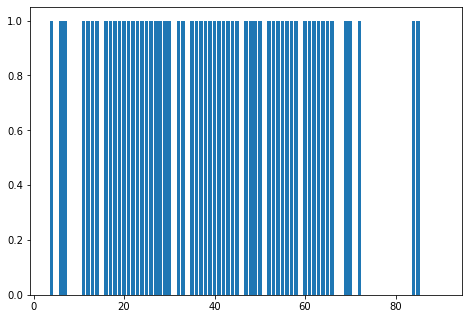

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = copyDF['AGE']
result = copyDF['1']
ax.bar(age,result)
plt.show()


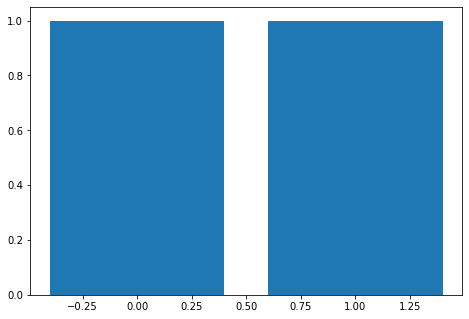

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = copyDF['GENDER']
result = copyDF['1']
ax.bar(gender,result)
plt.show()


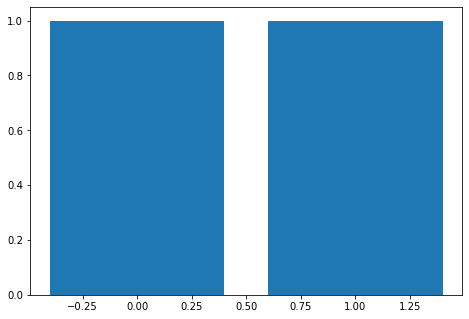

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = copyDF['GENDER']
result = copyDF['1']
ax.bar(gender,result) 
plt.show()
